<a href="https://colab.research.google.com/github/vign11/Medicaldata_anomalydetection/blob/main/gan_imggen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image generation using GANs

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.22.1
b

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

RuntimeError: Physical devices cannot be modified after being initialized

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
for gpu in gpus:
  print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteILVDOJ/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteILVDOJ/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [ ]:
import numpy as np

In [ ]:
dataiterator = ds.as_numpy_iterator()

In [ ]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

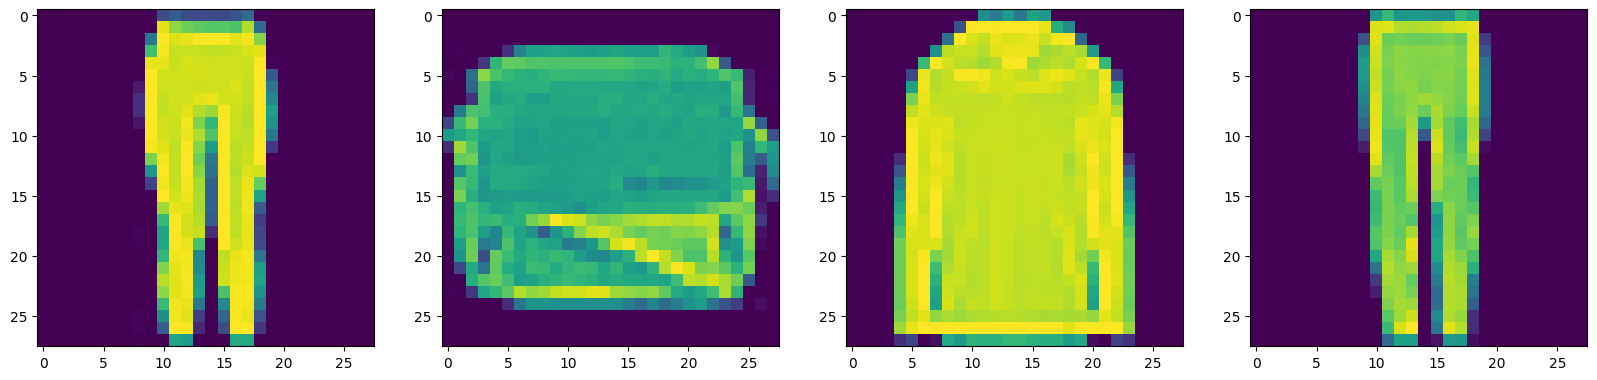

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))

In [ ]:
def scale_images(data):
  image = data['image']
  return image/255

In [ ]:
df = tfds.load('fashion_mnist',split ='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)


In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Build a Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

Generator

In [ ]:
def build_generator():
  model = Sequential()
  model.add(Dense(7*7*128,input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding = 'same',activation='sigmoid'))
  return model

In [ ]:
generator = build_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

Does this generator work?

In [ ]:
#sample image generation
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 2s 2s/step


In [ ]:
img.shape

(4, 28, 28, 1)

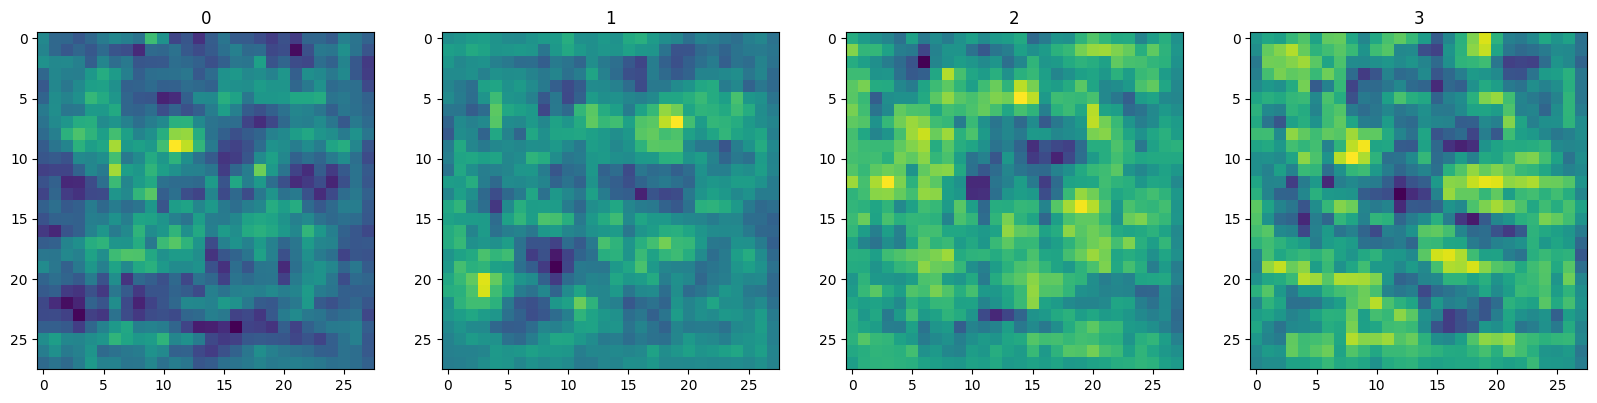

In [ ]:
#plotting the image array
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

Build Discriminator

In [ ]:
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))







  return model


In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
discriminator.predict(img)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv2d_10' (type Conv2D).
    
    Negative dimension size caused by subtracting 5 from 1 for '{{node sequential_2/conv2d_10/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2/ExpandDims, sequential_2/conv2d_10/Conv2D/ReadVariableOp)' with input shapes: [?,28,1,1], [5,5,1,32].
    
    Call arguments received by layer 'conv2d_10' (type Conv2D):
      • inputs=tf.Tensor(shape=(None, 28, 1, 1), dtype=float32)


In [ ]:
img = img[0]

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 348ms/step


array([[0.5094738]], dtype=float32)

Training Loop

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate =0.0002)
d_opt = Adam(learning_rate=0.00002)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
tf.random.normal((6,128,28,1))

<tf.Tensor: shape=(6, 128, 28, 1), dtype=float32, numpy=
array([[[[ 6.08870983e-01],
         [-6.05969071e-01],
         [-1.92571187e+00],
         ...,
         [-4.82910573e-01],
         [-7.94169128e-01],
         [ 2.89018322e-02]],

        [[ 7.59948418e-02],
         [-6.57209814e-01],
         [-1.29268503e+00],
         ...,
         [-1.85541973e-01],
         [-6.79362953e-01],
         [ 4.22656596e-01]],

        [[-5.14251053e-01],
         [-1.77912235e-01],
         [ 1.37324676e-01],
         ...,
         [-8.55384469e-01],
         [-5.59816301e-01],
         [ 1.14451694e+00]],

        ...,

        [[-7.69149214e-02],
         [-2.21299365e-01],
         [-2.30547324e-01],
         ...,
         [ 3.29302639e-01],
         [-1.87697852e+00],
         [-1.41194963e+00]],

        [[-3.98311734e-01],
         [ 4.25129116e-01],
         [-1.96649051e+00],
         ...,
         [-2.13333637e-01],
         [-1.37839541e-01],
         [-2.89205760e-01]],

        [

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator = generator
    self.discriminator = discriminator
  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss
  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training =False)

    #train the discriminator
    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images,training = True)
      yhat_fake = self.discriminator(fake_images,training = True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis = 0)
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
      #injecting noise
      noise_real = 0.2*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.2*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake], axis=0)

      #loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
    with tf.GradientTape() as g_tape:
      gen_images = self.generator(tf.random.normal((128,128,1)),training = True)
      predicted_labels = self.discriminator(gen_images, training = False)
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
    return{"d_loss": total_d_loss, "g_loss":total_g_loss }






If the g_loss and d-loss are not converging or are abnormal, consider
these modifications

*   Adjust the learning rate
*  Inject more or reduce the noise


*  Tweak the batch size









In [ ]:
fashgan = FashionGAN(generator,discriminator)

In [ ]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=5, latent_dim=128, output_dir='images'):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.output_dir = output_dir

        # Create the output directory if it doesn't exist
        os.makedirs(self.output_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()

        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(self.output_dir, f'generated_img_{epoch}_{i}.png'))

# Specify the path to the folder where you want to save the images
output_folder = '/content/drive/MyDrive/Steganography/Image/generatedimagestest'

# Instantiate the callback with the specified output directory
model_monitor = ModelMonitor(output_dir=output_folder)

# Train your GAN with the callback
hist = fashgan.fit(ds, epochs=100, callbacks=[model_monitor])


Epoch 1/100
469/469 [==============================] - 81s 166ms/step - d_loss: 0.3253 - g_loss: 1.4969
Epoch 2/100
469/469 [==============================] - 78s 165ms/step - d_loss: 0.3255 - g_loss: 1.5738
Epoch 3/100
469/469 [==============================] - 77s 165ms/step - d_loss: 0.3244 - g_loss: 1.6310
Epoch 4/100
469/469 [==============================] - 77s 165ms/step - d_loss: 0.3256 - g_loss: 1.6793
Epoch 5/100
469/469 [==============================] - 77s 165ms/step - d_loss: 0.3255 - g_loss: 1.6728
Epoch 6/100
469/469 [==============================] - 77s 165ms/step - d_loss: 0.3261 - g_loss: 1.6598
Epoch 7/100
469/469 [==============================] - 77s 165ms/step - d_loss: 0.3257 - g_loss: 1.7344
Epoch 8/100
469/469 [==============================] - 77s 164ms/step - d_loss: 0.3256 - g_loss: 1.7529
Epoch 9/100
469/469 [==============================] - 77s 164ms/step - d_loss: 0.3254 - g_loss: 1.8202
Epoch 10/100
469/469 [==============================] - 77s 164m

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Steganography/Image/generatedimagestest/generated_img_30_0.png'

In [ ]:
hist.history

{'d_loss': [0.27653294801712036,
  0.2707909643650055,
  0.2660907804965973,
  0.2772175371646881,
  0.2756267488002777,
  0.6142812371253967,
  0.5399685502052307,
  0.44078895449638367,
  0.3027975261211395,
  0.3113400340080261,
  0.289050817489624,
  0.2845139503479004,
  0.2737431228160858,
  0.4112227261066437,
  0.7665173411369324,
  0.884054958820343,
  0.2926059365272522,
  0.2699904143810272,
  0.29297536611557007,
  0.270418643951416],
 'g_loss': [5.450900077819824,
  5.123711585998535,
  5.007055282592773,
  4.6338653564453125,
  4.599225997924805,
  0.5916365385055542,
  0.6025559306144714,
  0.07230866700410843,
  0.005689345300197601,
  0.008043317124247551,
  0.011306428350508213,
  0.015011263079941273,
  0.011540531180799007,
  0.35099905729293823,
  0.4263553023338318,
  0.1886557787656784,
  0.021469462662935257,
  0.019755791872739792,
  0.015842560678720474,
  0.021491507068276405]}

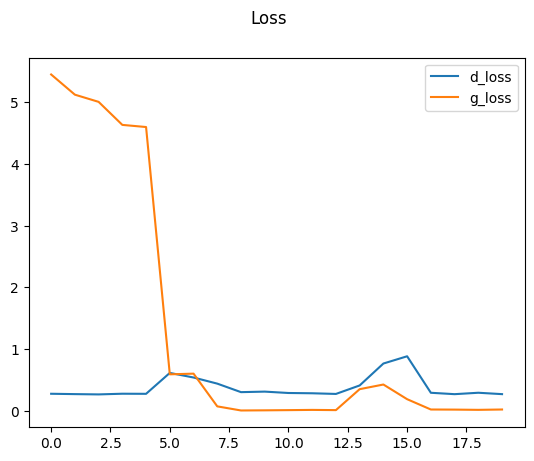

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))
imgs

1/1 [==============================] - 0s 467ms/step


array([[[[1.00000000e+00],
         [1.32216309e-17],
         [0.00000000e+00],
         ...,
         [1.96772237e-10],
         [4.27243358e-04],
         [3.91729146e-01]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.00140838e-08],
         [4.13509272e-03],
         [9.77252424e-01]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [8.37372127e-09],
         [2.07900739e-04],
         [3.87350351e-01]],

        ...,

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.02699320e-04],
         [1.58943425e-04],
         [3.30116078e-02]],

        [[2.17400016e-31],
         [4.07933561e-36],
         [2.57432835e-27],
         ...,
         [2.19979603e-03],
         [5.29137440e-04],
         [2.86572464e-02]],

        [[3.71225064e-14],
         [5.67277923e-16],
         [3.39462182e-12],
         ...,
 

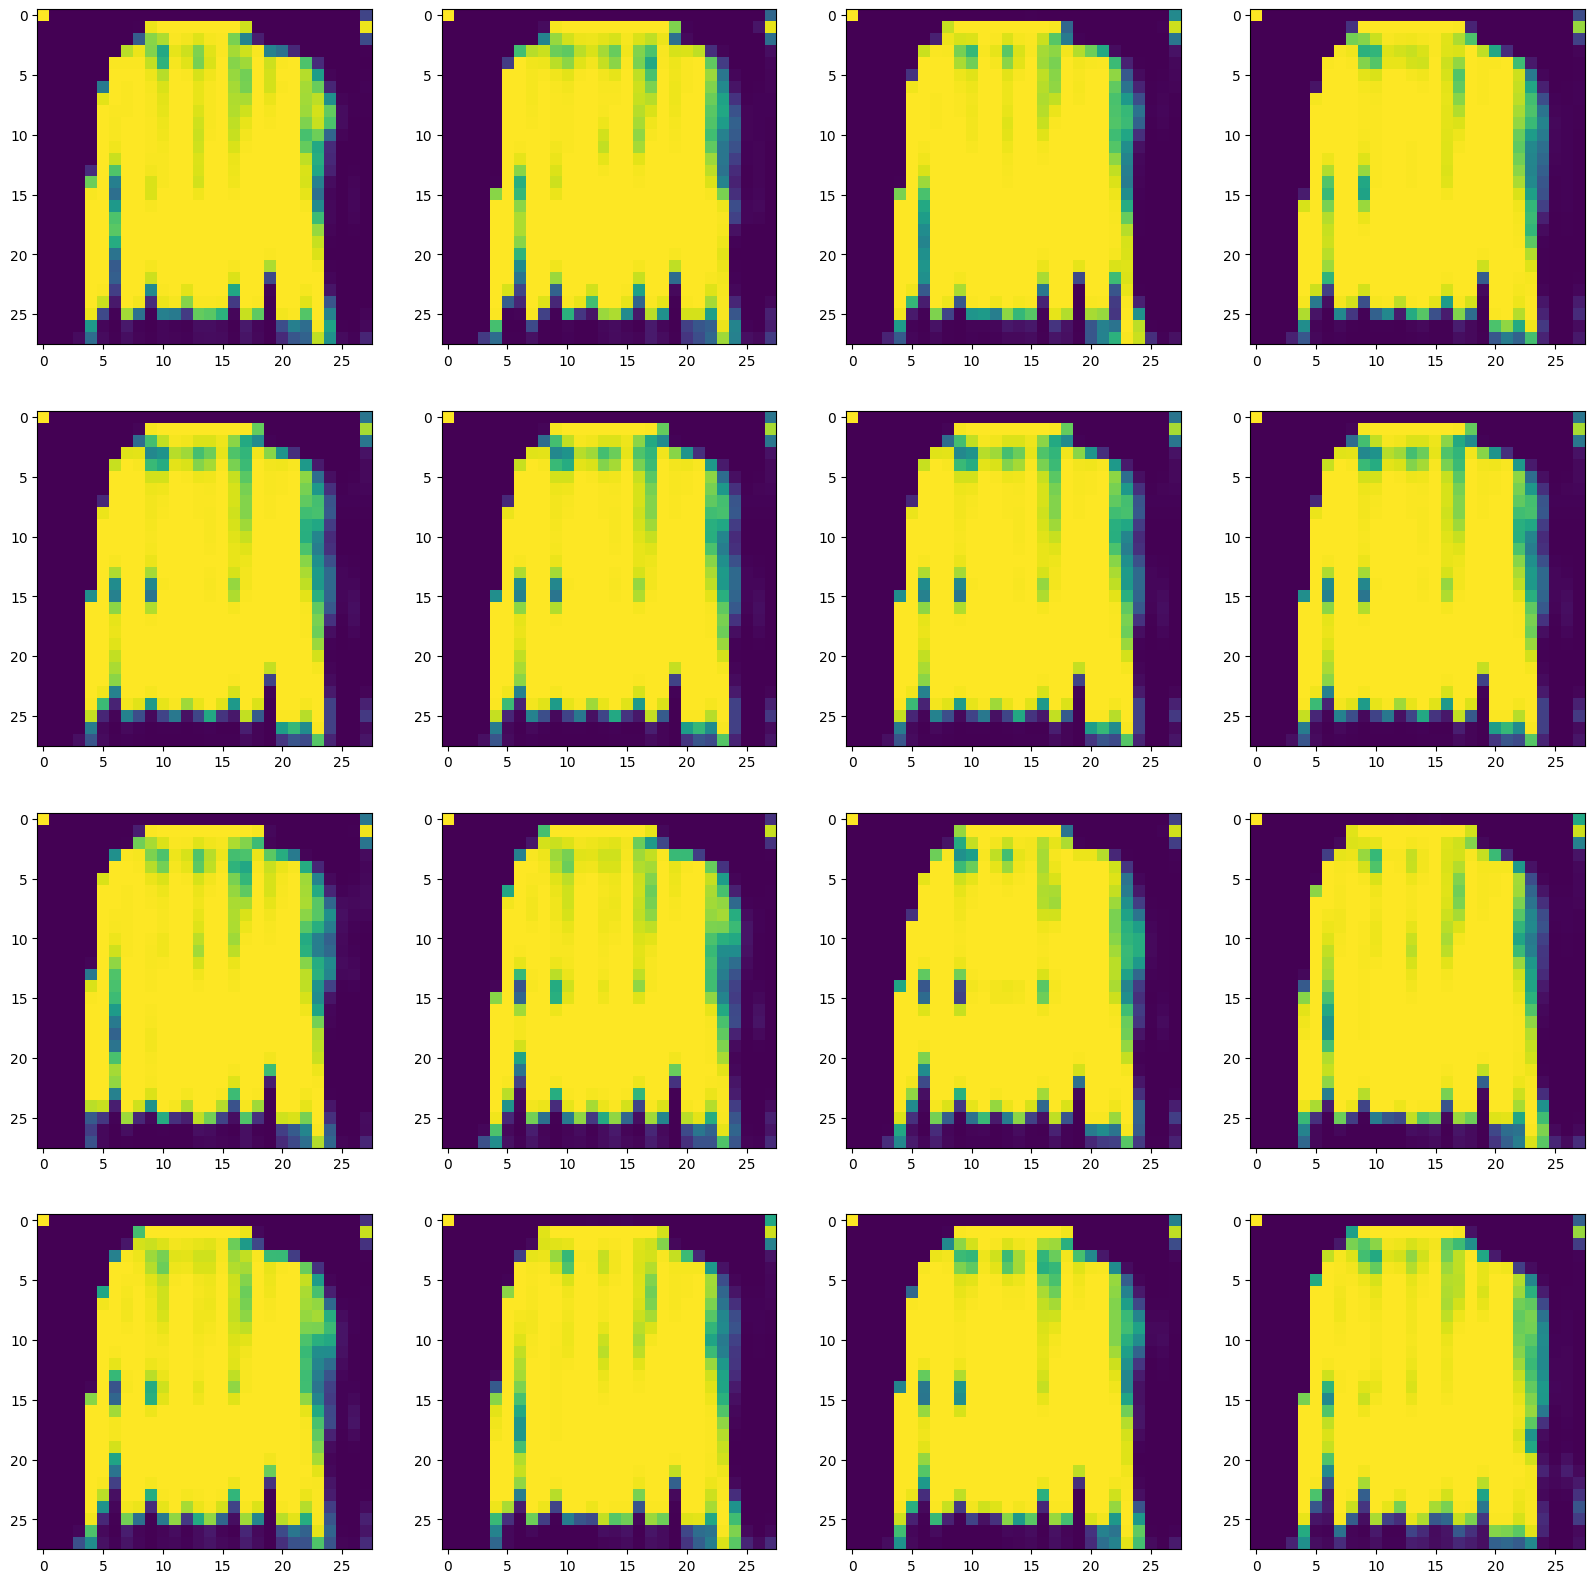

In [ ]:
fig,ax =plt.subplots(ncols = 4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r-1)*(c+1)-1])

In [ ]:
#save the model
generator.save('generator.h5')
discriminator.save('discriminator.h5')